<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/MLR_perhome_tcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from termcolor import colored as cl
from sklearn.model_selection import TimeSeriesSplit


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/data_no1.csv')
#df = df.drop(['time', 'tempk', 'forecasttime'], axis=1)
print(df.head(10))
print(df.describe(include='all'))


             timestamp  consumption  ...  forecasttotalpulse  homesforecastedpulse
0  2018-08-13 01:00:00     1.167373  ...                 NaN                   NaN
1  2018-08-13 02:00:00     1.171019  ...                 NaN                   NaN
2  2018-08-13 03:00:00     1.102508  ...                 NaN                   NaN
3  2018-08-13 04:00:00     1.281203  ...                 NaN                   NaN
4  2018-08-13 05:00:00     1.562144  ...                 NaN                   NaN
5  2018-08-13 06:00:00     1.401059  ...                 NaN                   NaN
6  2018-08-13 07:00:00     1.229084  ...                 NaN                   NaN
7  2018-08-13 08:00:00     1.124097  ...                 NaN                   NaN
8  2018-08-13 09:00:00     1.095233  ...                 NaN                   NaN
9  2018-08-13 10:00:00     1.076520  ...                 NaN                   NaN

[10 rows x 22 columns]
                  timestamp  ...  homesforecastedpulse
count   

In [ ]:
ActualLoad = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 2]).rename("load")
ForecastedLoad= (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 11])
tempC = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 4])
perHome= (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 0]).rename("load_Home")


In [ ]:
print(ActualLoad, ForecastedLoad, tempC, perHome)

timestamp
2018-08-13 01:00:00      3190.430
2018-08-13 02:00:00      3200.395
2018-08-13 03:00:00      3013.154
2018-08-13 04:00:00      3501.527
2018-08-13 05:00:00      4269.340
                          ...    
2021-01-28 18:00:00    180122.345
2021-01-28 19:00:00    180508.608
2021-01-28 20:00:00    177324.554
2021-01-28 21:00:00    171417.187
2021-01-28 22:00:00    163884.793
Name: load, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00      3500.891000
2018-08-13 02:00:00      3478.847000
2018-08-13 03:00:00      3408.319000
2018-08-13 04:00:00      3582.040000
2018-08-13 05:00:00      3897.122000
                           ...      
2021-01-28 18:00:00    177088.697967
2021-01-28 19:00:00    175249.211420
2021-01-28 20:00:00    171623.854528
2021-01-28 21:00:00    165562.169058
2021-01-28 22:00:00    157030.999172
Name: forecasttotal, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00     7.182149
2018-08-13 02:00:00     6.393077
2018-08-13 03:00:00     6.1173

In [ ]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]


**30 Day Moving Average**

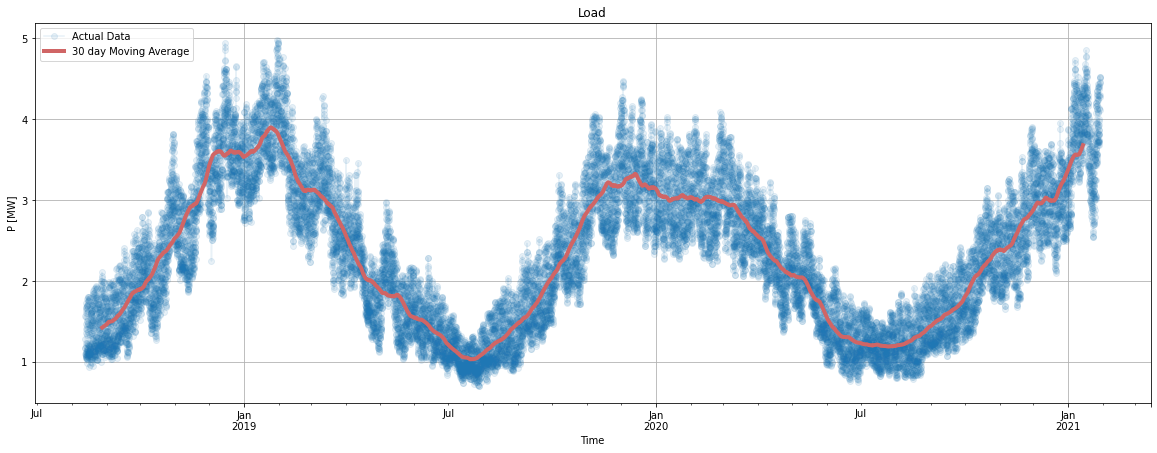

In [ ]:
perHome.plot(figsize=[20,7], alpha=0.1, marker="o")
#ForecastedLoad.plot(figsize=[20,7], alpha=0.1, marker=".")
perHome.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
#ActualLoad.rolling(window=7*24, center=True).mean().plot(ax=plt.gca(), color=green, lw=4);
#ForecastedLoad.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=green, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("P [MW]");
plt.title("Load");
plt.autoscale();

In [ ]:
print(tempC.max())
np.argmax(tempC)

29.965547263681003


8341

In [ ]:
tempC.index[8341]

Timestamp('2019-07-26 14:00:00')

In [ ]:
print(tempC.min())
np.argmin(tempC)

-16.015891472868


4063

In [ ]:
tempC.index[4063]

Timestamp('2019-01-29 08:00:00')

**Demand Profile for Colder and Hotter Weeks**

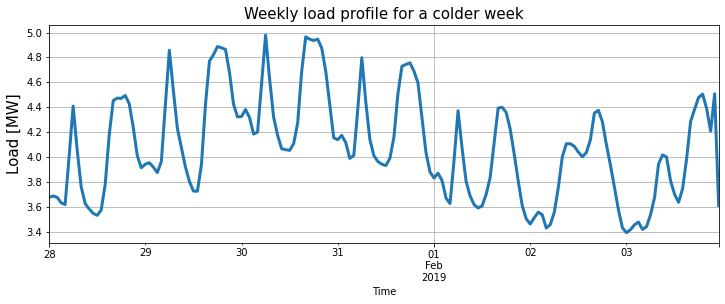

In [ ]:
perHome["2019-1-28": "2019-2-3"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Load [MW]", fontsize=15)
plt.title("Weekly load profile for a colder week", fontsize=15)
plt.xlabel("Time")
plt.grid()

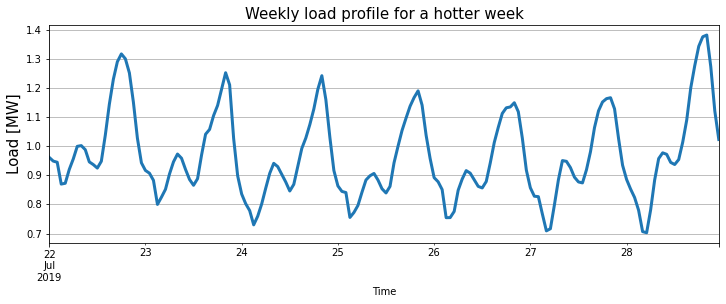

In [ ]:
perHome["2019-7-22": "2019-7-28"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Load [MW]", fontsize=15)
plt.title("Weekly load profile for a hotter week", fontsize=15)
plt.xlabel("Time")
plt.grid()

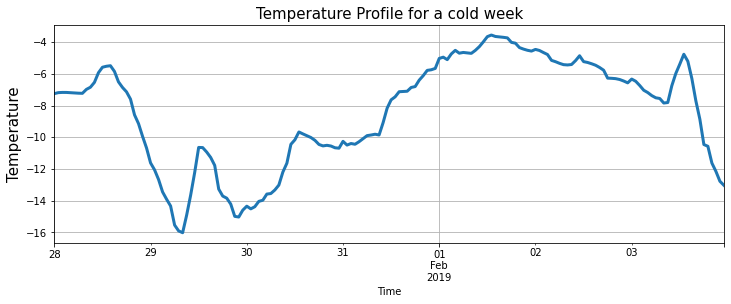

In [ ]:
tempC["2019-1-28": "2019-2-3"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Temperature", fontsize=15)
plt.title("Temperature Profile for a cold week", fontsize=15)
plt.xlabel("Time")
plt.grid()

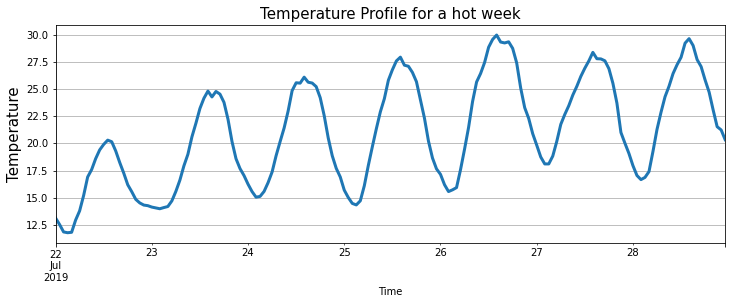

In [ ]:
tempC["2019-7-22": "2019-7-28"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Temperature", fontsize=15)
plt.title("Temperature Profile for a hot week", fontsize=15)
plt.xlabel("Time")
plt.grid()

In [ ]:
def getSeason(perHome):
  season=pd.Series()
  
  for year in perHome.index.year.unique():

    yearlySeason = pd.Series("inter-season", index=perHome.loc[str(year)].index)

    yearlySeason.loc[: "{}-2-27".format(year)] ="winter"
    yearlySeason.loc["{}-11-1".format(year):] = "winter"
    yearlySeason.loc["{}-5-1".format(year): "{}-9-30".format(year)]= "summer"

    season=pd.concat([season, yearlySeason])
  return season

In [ ]:
season= getSeason(perHome).rename("season")
print(season)

2018-08-13 01:00:00    summer
2018-08-13 02:00:00    summer
2018-08-13 03:00:00    summer
2018-08-13 04:00:00    summer
2018-08-13 05:00:00    summer
                        ...  
2021-01-28 18:00:00    winter
2021-01-28 19:00:00    winter
2021-01-28 20:00:00    winter
2021-01-28 21:00:00    winter
2021-01-28 22:00:00    winter
Name: season, Length: 21598, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
def plot_daily(perHome, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= perHome[season==seasonStr].to_frame()
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("load_Home", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("Load", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [ ]:
def plot_season(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), 
                                                              x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

**Daily Load Profiles in Different Seasons**

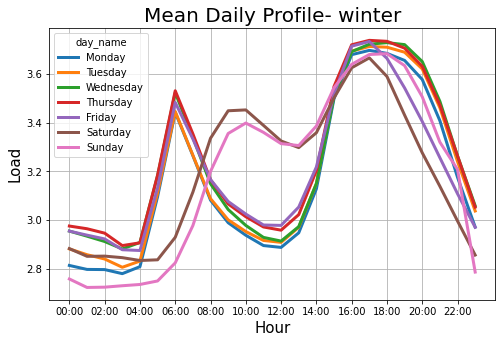

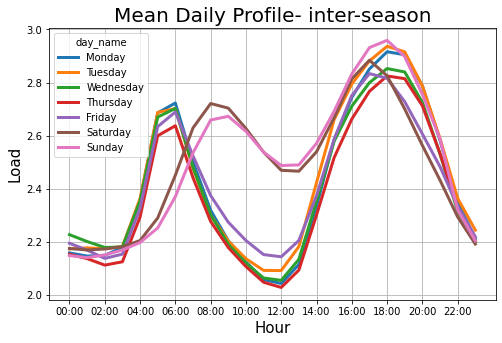

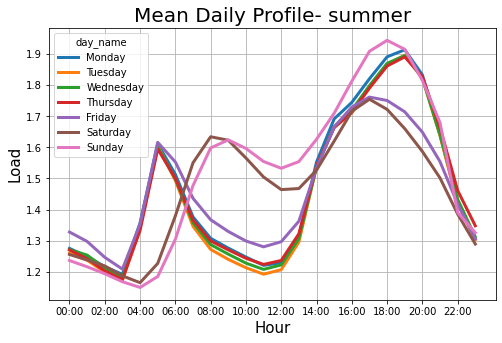

In [ ]:
plot_daily(perHome, seasonStr="winter")
plot_daily(perHome, seasonStr="inter-season")
plot_daily(perHome, seasonStr="summer")

**Seasonal Variations**

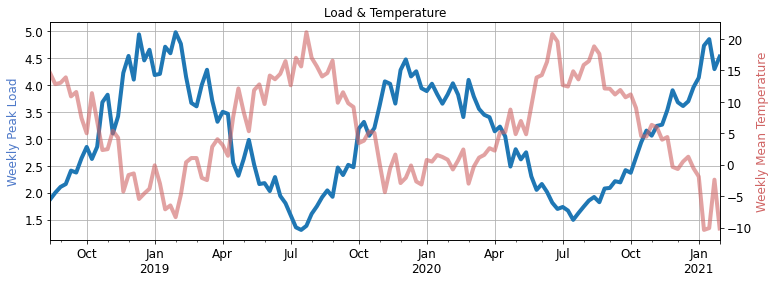

In [ ]:
fig, axes1 = plt. subplots(figsize=[12,4])
perHome.resample("w").max().plot(ax=axes1, lw=4)
plt.xlabel("")
plt.ylabel("Weekly Peak Load", fontsize=12, color=blue);
plt.xticks(fontsize=12), plt.yticks(fontsize=12);
plt.grid()
plt.title("Load & Temperature")

axes2=axes1.twinx()
tempC.resample("W").mean().plot(ax=axes2, alpha=0.6, lw=4, color=red);
plt.yticks(fontsize=12);
plt.ylabel("Weekly Mean Temperature", fontsize=12, color=red);
plt.autoscale()

**Correlation Between Load & Temperature**

Poor Correlation at hourly resolution  but at daily resolution it doesnot create a double hockey stick as it does in the paper. Can't say anything about correlation here either.

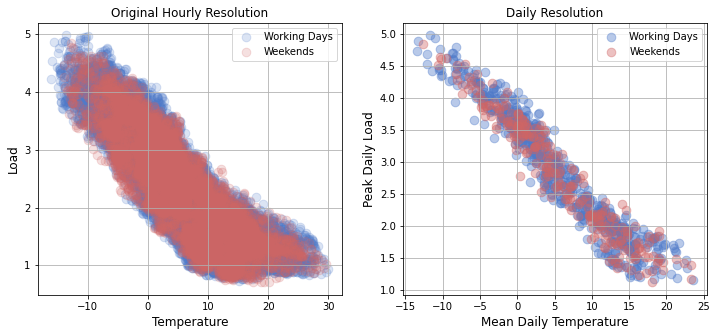

In [ ]:
s=75
fig= plt.figure(figsize=[12,5])

fig.add_subplot(1,2,1)
plt.scatter(x=tempC[perHome.index.dayofweek < 5],
            y=perHome[perHome.index.dayofweek < 5],
            alpha=0.2, s=s, color=blue);
plt.scatter(x=tempC[perHome.index.dayofweek >= 5],
            y=perHome[perHome.index.dayofweek >= 5],
            alpha=0.2, s=s, color=red);
plt.grid()
plt.xlabel("Temperature", fontsize=12),
plt.ylabel("Load", fontsize=12);
plt.legend(["Working Days", "Weekends"])
plt.title("Original Hourly Resolution");
plt.autoscale()

fig.add_subplot(1,2,2)
plt.scatter(x=tempC[perHome.index.dayofweek < 5].resample("d").mean(),
            y=perHome[perHome.index.dayofweek < 5].resample("d").max(),
            alpha=0.4,
            s=s,
            color=blue);
plt.scatter(x=tempC[perHome.index.dayofweek >= 5].resample("d").mean(),
            y=perHome[perHome.index.dayofweek >= 5].resample("d").max(),
            alpha=0.4,
            s=s,
            color=red);
plt.grid()
plt.xlabel("Mean Daily Temperature", fontsize=12),
plt.ylabel("Peak Daily Load", fontsize=12);
plt.legend(["Working Days", "Weekends"]);
plt.title("Daily Resolution");
plt.autoscale()

**Correlation b/w Daily Load & Temperature- by Season & Day Type**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


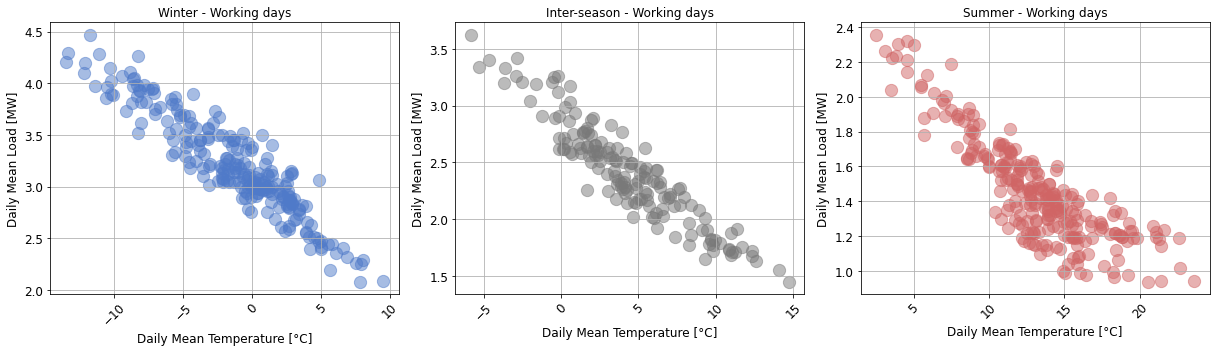

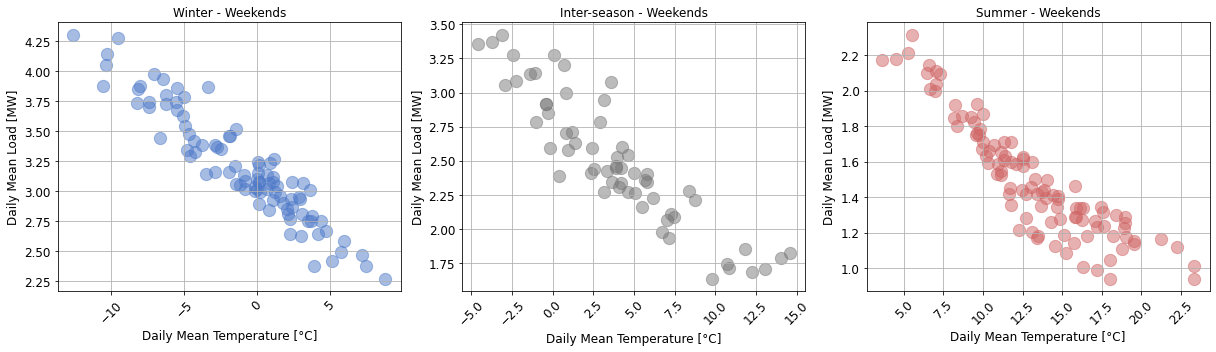

In [ ]:
plot_season(x=tempC.loc[perHome.index.dayofweek < 5], 
             y=perHome.loc[perHome.index.dayofweek < 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [MW]", 
             title="Working days",
             freq="24h",
             s=150
             )

plot_season(x=tempC.loc[perHome.index.dayofweek >= 5], 
             y=perHome.loc[perHome.index.dayofweek >= 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [MW]", 
             title="Weekends",
             freq="24h",
             s=150
             )

**Correlation between Hourly Load & Temperature- by Season, hour & Day Type**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


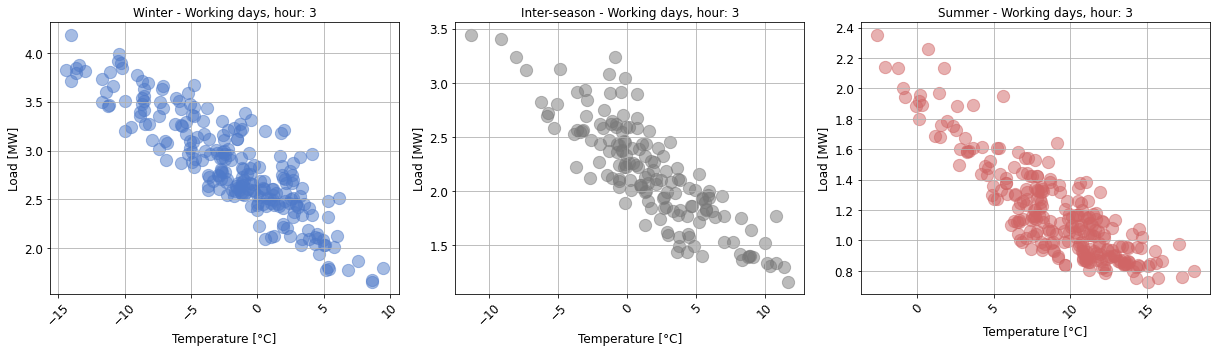

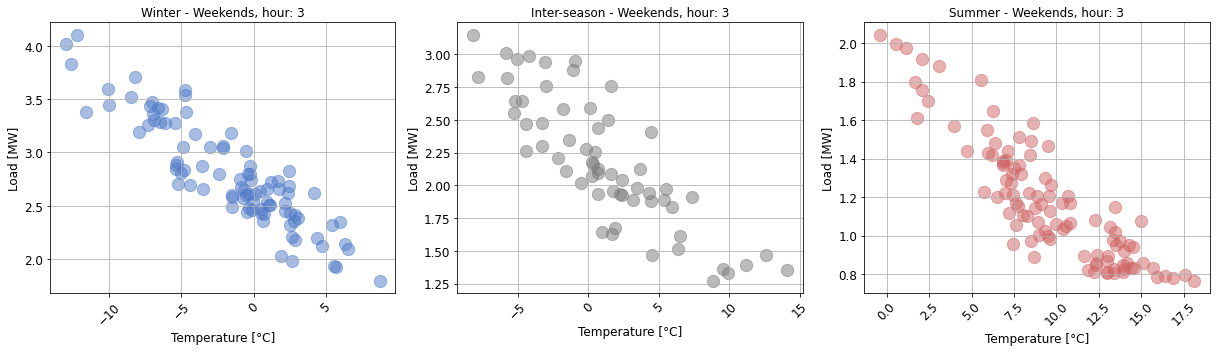

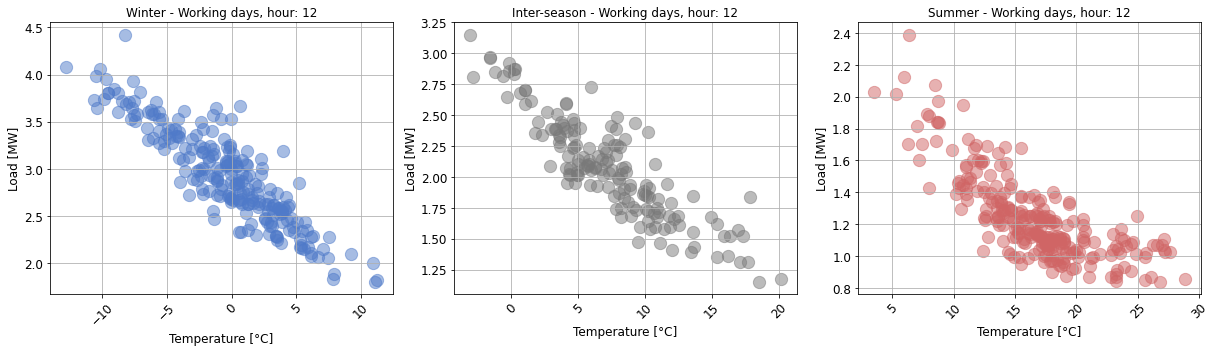

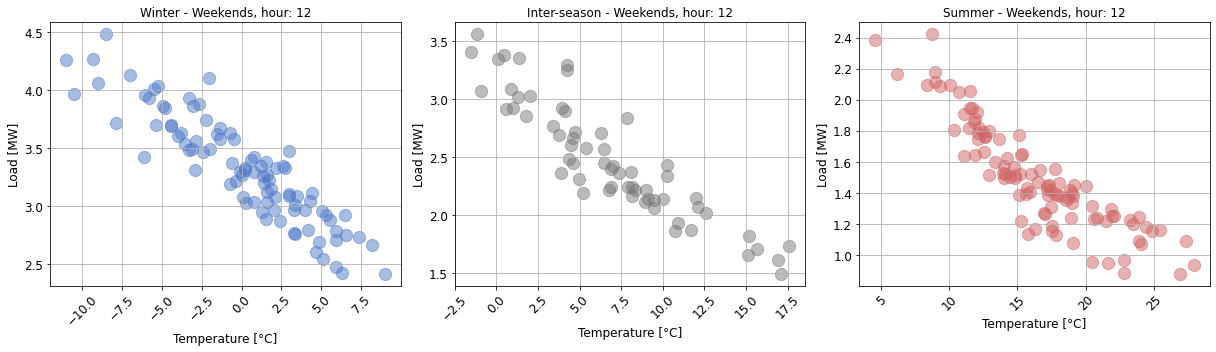

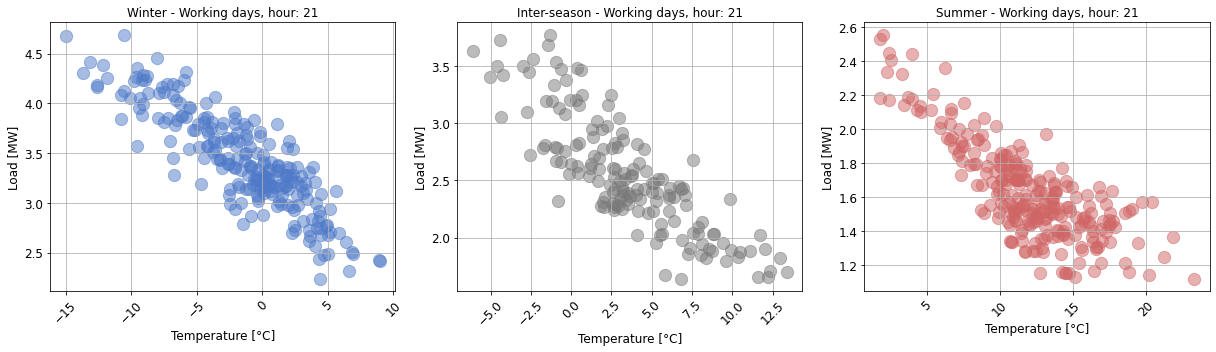

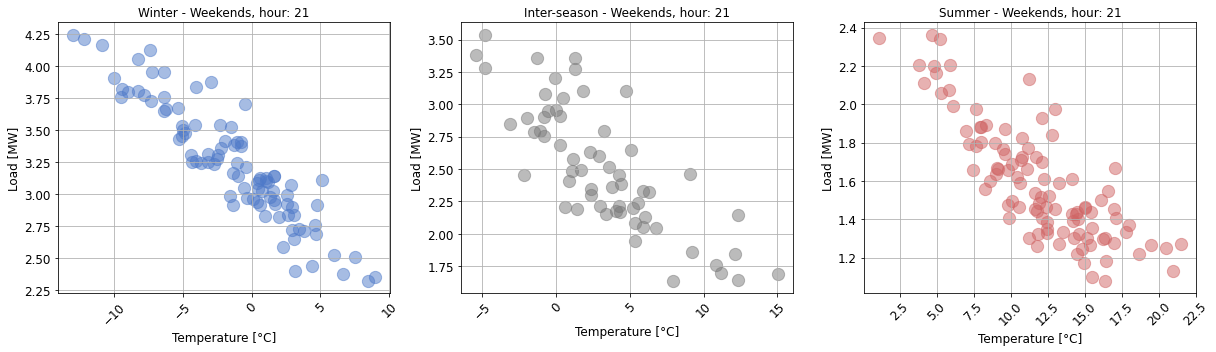

In [ ]:
for hour in [3, 12, 21]:
    
    plot_season(x=tempC.loc[(perHome.index.dayofweek < 5) & (perHome.index.hour == hour)], 
                 y=perHome.loc[(perHome.index.dayofweek < 5) & (perHome.index.hour == hour)],
                 xlabel="Temperature [°C]", 
                 ylabel="Load [MW]", 
                 title="Working days, hour: {}".format(hour),
                 freq="1h",
                 s=150)

    plot_season(x=tempC.loc[(perHome.index.dayofweek >= 5) & (perHome.index.hour == hour)], 
                 y=perHome.loc[(perHome.index.dayofweek >= 5) & (perHome.index.hour == hour)], 
                 xlabel="Temperature [°C]", 
                 ylabel="Load [MW]", 
                 title="Weekends, hour: {}".format(hour),  
                 freq="1h",
                 s=150)

In [ ]:
def get_interactions(s, dummies, poly_degree=1):
    if s.name == None: s.name = "_"
    s1 = dummies.apply(lambda x: x * s).rename("{}".format(s.name + "_{}").format, axis=1)
    s2 = (dummies.apply(lambda x: x * s) **2).rename("{}".format(s.name + "2_{}").format, axis=1)
    s3 = (dummies.apply(lambda x: x * s) **3).rename("{}".format(s.name + "3_{}").format, axis=1)
    
    if poly_degree == 1: s2, s3 = None, None
    if poly_degree == 2: s3 = None

    df = pd.concat([s1, s2, s3], axis=1)
    return df


In [ ]:
def get_season(ts_in):
    season = pd.Series()

    for year in ts_in.index.year.unique():

        # CREATE SEASONS
        yearly_season = pd.Series("inter-season", index=ts_in.loc[str(year)].index)

        yearly_season.loc[: "{}-2-15".format(year)] = "winter"
        yearly_season.loc["{}-11-15".format(year) :] = "winter"
        yearly_season.loc["{}-5-15".format(year) : "{}-9-15".format(year)] = "summer"

        season = pd.concat([season, yearly_season])
    return season


In [ ]:
y_home= perHome.rename("y_home").copy()

In [ ]:
season = get_season(y_home).rename("season")
month = pd.Series(y_home.index.month.astype(str), index=y_home.index, name="month").apply(lambda x: "m{}".format(x))
day = pd.Series(y_home.index.dayofweek.astype(str), index=y_home.index, name="day").apply(lambda x: "d{}".format(x))
hour = pd.Series(y_home.index.strftime("%H:%M"), index=y_home.index, name="hour")
dayhour = (day + "_" + hour).rename("dayhour")

month_dummies = pd.get_dummies(month.sort_values()).sort_index()
day_dummies = pd.get_dummies(day.sort_values()).sort_index()
hour_dummies = pd.get_dummies(hour.sort_values()).sort_index()
dayhour_dummies = pd.get_dummies(dayhour.sort_values()).sort_index()

trend = pd.Series(np.arange(1, len(y_home) + 1), y_home.index, name="trend")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

**Features: Hour of the Day**

Without dropping intercept and dummy variables.

In [ ]:
X_var = hour_dummies.values
y_var = y_home.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)
y_pred_hour=yhat.copy()
MAPE = mean_absolute_percentage_error(y_test, yhat)
print('MAPE:', MAPE)
print(yhat)

MAPE: 40.61250718911984
[[2.19775391]
 [2.48095703]
 [2.73632812]
 ...
 [2.19775391]
 [2.70703125]
 [2.1796875 ]]


In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
X_var = hour_dummies.values
y_var = y_home.values.reshape(-1, 1)
lr = LinearRegression()
scores = cross_val_score(lr, X_var, y_var, cv=cv, n_jobs=1)
yhat= cross_val_predict(lr, X_var, y_var, cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAPE= mean_absolute_percentage_error(y_var, yhat)
print(MAPE)

Accuracy: 0.065 (0.004)
40.36350796105493


In [ ]:
#timeseries cross val
X = hour_dummies.values
y = y_home.values.reshape(-1, 1)
X_train = X[:int(X.shape[0]*0.2)]
X_test = X[int(X.shape[0]*0.2):]
y_train = y[:int(X.shape[0]*0.2)]
y_test = y[int(X.shape[0]*0.2):]
tscv = TimeSeriesSplit(n_splits=5)
i = 1
score = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train[tr_index], X_train[val_index]
    y_tr, y_val = y_train[tr_index], y_train[val_index]
    rfr = LinearRegression()
    rfr.fit(X_tr, y_tr)
    yhat=rfr.predict(X_val)
    score.append([i, rfr.score(X_val, y_val)])
    i += 1
MAPE= mean_absolute_percentage_error(y_val,yhat)
print(MAPE)

35.544609193451414


In [ ]:
X_var = hour_dummies.values
y_var = y_home.values.reshape(-1, 1)
sm_X_var= sm.add_constant(X_var)
mlr_model= sm.OLS(y_var, sm_X_var)
mlr_reg= mlr_model.fit()
yhat= mlr_reg.predict()
MAPE= mean_absolute_percentage_error(y_var, yhat )
print('MAPE:' , MAPE)
mlr_reg.summary()


MAPE: 40.32363005578616


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     68.01
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.15e-305
Time:                        16:20:07   Log-Likelihood:                -27847.
No. Observations:               21598   AIC:                         5.574e+04
Df Residuals:                   21574   BIC:                         5.593e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2407      0.006    390.276      0.000       2.229       2.252
x1            -0.1619      0.029     -5.643      0.000      -0.218      -0.106
x2            -0.1832      0.029     -6.386      0.000      -0.239      -0.127
x3            -0.2029      0.029     -7.074      0.000      -0.259      -0.147
x4            -0.2203      0.029     -7.682      0.000      -0.277      -0.164
x5            -0.1410      0.029     -4.917      0.000      -0.197      -0.085
x6             0.0699      0.029      2.439      0.015       0.014       0.126
x7             0.1728      0.029      6.023      0.000       0.117       0.229
x8             0.1023      0.029      3.566      0.000       0.046       0.159
x9             0.0475      0.029      1.656      0.098      -0.009       0.104
x10            0.0102      0.029      0.355      0.722      -0.046       0.066
x11           -0.0312      0.029     -1.089      0.276      -0.087       0.025
x12           -0.0748      0.029     -2.609      0.009      -0.131      -0.019
x13           -0.0886      0.029     -3.088      0.002      -0.145      -0.032
x14           -0.0366      0.029     -1.275      0.202      -0.093       0.020
x15            0.1281      0.029      4.467      0.000       0.072       0.184
x16            0.3293      0.029     11.480      0.000       0.273       0.385
x17            0.4496      0.029     15.674      0.000       0.393       0.506
x18            0.5084      0.029     17.726      0.000       0.452       0.565
x19            0.5225      0.029     18.217      0.000       0.466       0.579
x20            0.4886      0.029     17.034      0.000       0.432       0.545
x21            0.3920      0.029     13.668      0.000       0.336       0.448
x22            0.2335      0.029      8.139      0.000       0.177       0.290
x23            0.0386      0.029      1.345      0.179      -0.018       0.095
x24           -0.1119      0.029     -3.900      0.000      -0.168      -0.056
==============================================================================
Omnibus:                     5219.101   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1106.227
Skew:                           0.237   Prob(JB):                    6.11e-241
Kurtosis:                       1.997   Cond. No.                     1.33e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Features: Month + Day of the Week + Hour of the Day**

Dropping one dummy to avoid colinearity

In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               day_dummies.iloc[:, :-1],   
               hour_dummies.iloc[:, :-1]    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size =0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)
y_pred_mdh = yhat.copy() 
MAPE = mean_absolute_percentage_error(y_test, yhat)
print('MAPE:', MAPE)
print(yhat)

MAPE: 12.547573843244656
[[1.20064099]
 [1.98339415]
 [3.29341428]
 ...
 [2.13383762]
 [3.89180154]
 [1.17054971]]


In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
X = pd.concat([month_dummies.iloc[:, :-1],  
               day_dummies.iloc[:, :-1],   
               hour_dummies.iloc[:, :-1]    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
lr = LinearRegression()
scores = cross_val_score(lr, X_var, y_var, cv=cv, n_jobs=1)
yhat= cross_val_predict(lr, X_var, y_var, cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAPE= mean_absolute_percentage_error(y_var, yhat)
print(MAPE)

Accuracy: 0.842 (0.003)
12.462802386686642


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               day_dummies.iloc[:, :-1],   
               hour_dummies.iloc[:, :-1]    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
sm_X_var= sm.add_constant(X_var)
mlr_model= sm.OLS(y_var, sm_X_var)
mlr_reg= mlr_model.fit()
yhat= mlr_reg.predict()
MAPE= mean_absolute_percentage_error(y_var, yhat )
print('MAPE:' , MAPE)
mlr_reg.summary()


MAPE: 12.435815574472628


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2888.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:22:03   Log-Likelihood:                -8627.4
No. Observations:               21598   AIC:                         1.734e+04
Df Residuals:                   21557   BIC:                         1.766e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4741      0.015     96.221      0.000       1.444       1.504
x1             1.8373      0.011    167.141      0.000       1.816       1.859
x2             0.6221      0.011     57.067      0.000       0.601       0.644
x3             1.2275      0.011    111.690      0.000       1.206       1.249
x4             1.6209      0.011    148.707      0.000       1.600       1.642
x5             1.5136      0.012    121.290      0.000       1.489       1.538
x6             1.2267      0.012    100.824      0.000       1.203       1.251
x7             0.5282      0.012     42.986      0.000       0.504       0.552
x8             0.2025      0.012     16.644      0.000       0.179       0.226
x9            -0.2949      0.012    -24.003      0.000      -0.319      -0.271
x10           -0.5196      0.012    -42.700      0.000      -0.543      -0.496
x11           -0.3475      0.011    -30.768      0.000      -0.370      -0.325
x12           -0.0360      0.009     -3.915      0.000      -0.054      -0.018
x13           -0.0326      0.009     -3.544      0.000      -0.051      -0.015
x14           -0.0233      0.009     -2.530      0.011      -0.041      -0.005
x15           -0.0273      0.009     -2.967      0.003      -0.045      -0.009
x16           -0.0377      0.009     -4.091      0.000      -0.056      -0.020
x17           -0.0186      0.009     -2.016      0.044      -0.037      -0.001
x18           -0.0524      0.017     -3.079      0.002      -0.086      -0.019
x19           -0.0725      0.017     -4.259      0.000      -0.106      -0.039
x20           -0.0922      0.017     -5.417      0.000      -0.126      -0.059
x21           -0.1097      0.017     -6.441      0.000      -0.143      -0.076
x22           -0.0304      0.017     -1.784      0.074      -0.064       0.003
x23            0.1806      0.017     10.605      0.000       0.147       0.214
x24            0.2834      0.017     16.643      0.000       0.250       0.317
x25            0.2129      0.017     12.505      0.000       0.180       0.246
x26            0.1581      0.017      9.287      0.000       0.125       0.192
x27            0.1208      0.017      7.096      0.000       0.087       0.154
x28            0.0794      0.017      4.663      0.000       0.046       0.113
x29            0.0358      0.017      2.103      0.036       0.002       0.069
x30            0.0221      0.017      1.295      0.195      -0.011       0.055
x31            0.0741      0.017      4.351      0.000       0.041       0.107
x32            0.2388      0.017     14.022      0.000       0.205       0.272
x33            0.4399      0.017     25.835      0.000       0.407       0.473
x34            0.5602      0.017     32.899      0.000       0.527       0.594
x35            0.6191      0.017     36.355      0.000       0.586       0.652
x3

**Features: Month + Day of the Week x Hour of the Day**

In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1], 
               dayhour_dummies.iloc[:, :-1],    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size =0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)
y_pred_mdxh = yhat.copy() 
MAPE = mean_absolute_percentage_error(y_test, yhat)
print('MAPE:', MAPE)
print(yhat)

MAPE: 12.104203996781164
[[1.39187822]
 [1.92068503]
 [3.29178418]
 ...
 [2.06943188]
 [3.94488283]
 [1.05583282]]


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1], 
               dayhour_dummies.iloc[:, :-1],    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
lr = LinearRegression()
scores = cross_val_score(lr, X_var, y_var, cv=cv, n_jobs=1)
yhat= cross_val_predict(lr, X_var, y_var, cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAPE= mean_absolute_percentage_error(y_var, yhat)
print(MAPE)

Accuracy: 0.852 (0.002)
12.00441223446496


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1], 
               dayhour_dummies.iloc[:, :-1],    
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
sm_X_var= sm.add_constant(X_var)
mlr_model= sm.OLS(y_var, sm_X_var)
mlr_reg= mlr_model.fit()
yhat= mlr_reg.predict()
MAPE= mean_absolute_percentage_error(y_var, yhat )
print('MAPE:' , MAPE)
mlr_reg.summary()


MAPE: 11.868559435688155


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     710.6
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:22:48   Log-Likelihood:                -7736.6
No. Observations:               21598   AIC:                         1.583e+04
Df Residuals:                   21419   BIC:                         1.726e+04
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3808      0.032     43.806      0.000       1.319       1.443
x1             1.8374      0.011    173.622      0.000       1.817       1.858
x2             0.6221      0.010     59.279      0.000       0.602       0.643
x3             1.2275      0.011    116.020      0.000       1.207       1.248
x4             1.6209      0.010    154.472      0.000       1.600       1.641
x5             1.5136      0.012    125.991      0.000       1.490       1.537
x6             1.2267      0.012    104.732      0.000       1.204       1.250
x7             0.5282      0.012     44.652      0.000       0.505       0.551
x8             0.2025      0.012     17.289      0.000       0.180       0.226
x9            -0.2949      0.012    -24.933      0.000      -0.318      -0.272
x10           -0.5196      0.012    -44.356      0.000      -0.543      -0.497
x11           -0.3475      0.011    -31.961      0.000      -0.369      -0.326
x12           -0.0077      0.043     -0.178      0.859      -0.093       0.077
x13           -0.0249      0.043     -0.575      0.566      -0.110       0.060
x14           -0.0374      0.043     -0.862      0.389      -0.122       0.048
x15           -0.0462      0.043     -1.066      0.287      -0.131       0.039
x16            0.0726      0.043      1.675      0.094      -0.012       0.158
x17            0.3570      0.043      8.232      0.000       0.272       0.442
x18            0.4534      0.043     10.454      0.000       0.368       0.538
x19            0.2813      0.043      6.487      0.000       0.196       0.366
x20            0.1435      0.043      3.309      0.001       0.058       0.229
x21            0.0697      0.043      1.606      0.108      -0.015       0.155
x22            0.0203      0.043      0.469      0.639      -0.065       0.105
x23           -0.0216      0.043     -0.497      0.619      -0.107       0.063
x24           -0.0246      0.043     -0.568      0.570      -0.110       0.060
x25            0.0473      0.043      1.091      0.275      -0.038       0.132
x26            0.2611      0.043      6.020      0.000       0.176       0.346
x27            0.5113      0.043     11.789      0.000       0.426       0.596
x28            0.6364      0.043     14.672      0.000       0.551       0.721
x29            0.6987      0.043     16.109      0.000       0.614       0.784
x30            0.7376      0.043     17.006      0.000       0.653       0.823
x31            0.7333      0.043     16.908      0.000       0.648       0.818
x32            0.6447      0.043     14.865      0.000       0.560       0.730
x33            0.4577      0.043     10.553      0.000       0.373       0.543
x34            0.2306      0.043      5.317      0.000       0.146       0.316
x35            0.0766      0.043      1.766      0.077      -0.008       0.162
x3

In [ ]:
preds =np.concatenate((y_pred_hour,y_pred_mdh,y_pred_mdxh), axis=1)
preds_ser= pd.Series(list(preds))

In [ ]:
#ADD plots

**Create Artificial Dataset**

Adding noise:
 $y_{true}$ = $y_{pred}$ + $random\_gaussian\_noise$

In [ ]:
#create piece-wise quadratic function and add Gaussian noise
x_arr = np.arange(0, 4, 0.01).reshape(-1, 1)
y_arr = np.zeros_like(x_arr)

x = pd.Series(x_arr.flatten())

threshold = 2
np.random.seed(0)

actual_func_left = - 4 * x_arr[x_arr < threshold] + 1.5 * x_arr[x_arr < threshold] ** 2 
actual_func_right =  -x_arr[x_arr >= threshold] + 0.5 * x_arr[x_arr >= threshold] ** 2
actual_func = np.concatenate([actual_func_left, actual_func_right])

y_arr[x_arr < threshold] = actual_func_left + np.random.normal(scale=1, size=len(x_arr[x_arr < threshold]))
y_arr[x_arr >= threshold] = actual_func_right + np.random.normal(scale=1, size=len( x_arr[x_arr >= threshold]))

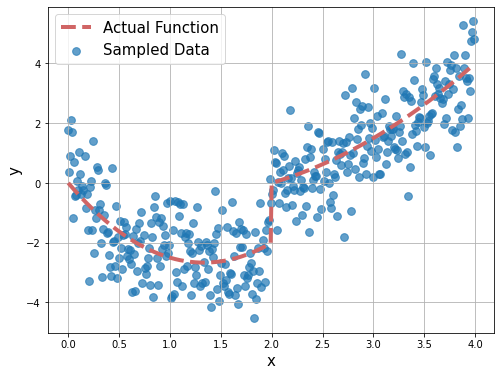

In [ ]:
fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
plt.plot(x_arr, actual_func, ls="--", lw=4, color=red, label="Actual Function")
plt.grid(), plt.legend(fontsize=15);
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

Correlation non linear- models fails to capture it.

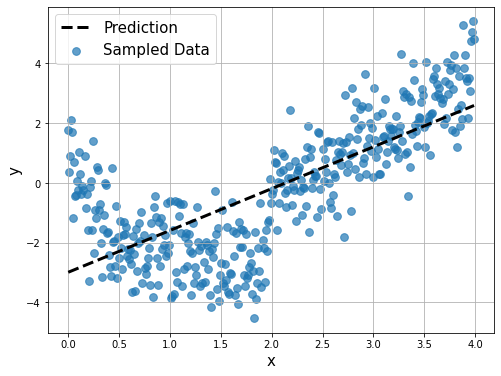

In [ ]:
X = pd.concat([x
              ], axis=1)
X_arr = X.values.reshape(-1, 1)

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);


**Piecewise Linear Regression**

Segmenting numerical features into two features. These two features (x_left & x_right) are created from an original feature $x$, whereas one is defined only on a left side and another only on the right side of $x$-axis otherwise, it equals zero.



In [ ]:
x_left, x_right = x.rename("x_left").copy(), x.rename("x_right").copy()
x_left.loc[x > 2] = 0
x_right.loc[x <= 2] = 0

X = pd.concat([x_left, x_right, 
              ], axis=1)
X_arr = X.values

X.head()

,x_left,x_right
0,0.00,0.0
1,0.01,0.0
2,0.02,0.0
3,0.03,0.0
4,0.04,0.0


Model fits it much better.

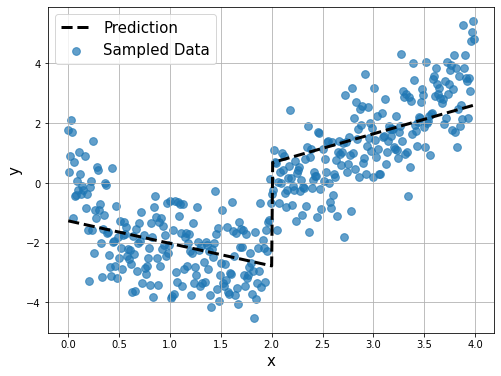

In [ ]:
mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Adding a second degree polynomial**

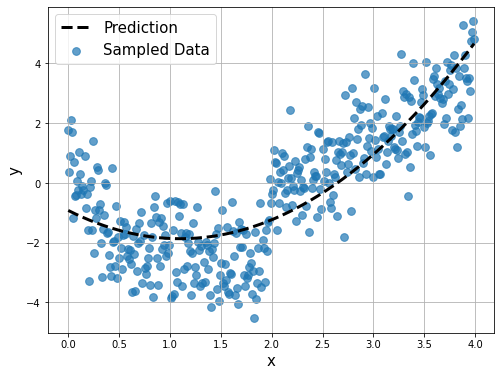

In [ ]:
X = pd.concat([x, x ** 2
              ], axis=1)
X_arr = X.values

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Adding a second degree polynomial with segmentation**

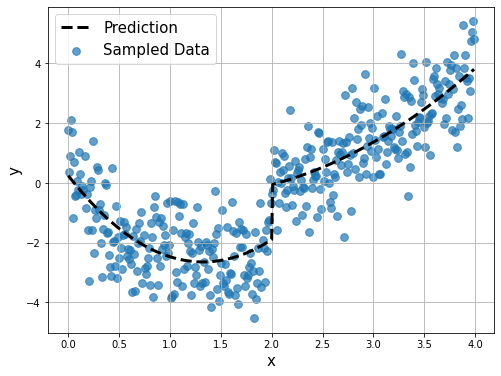

In [ ]:
x_left, x_right = x.rename("x_left").copy(), x.rename("x_right").copy()
x_left.loc[x > 2] = 0
x_right.loc[x <= 2] = 0


X = pd.concat([x_left, x_left ** 2, 
               x_right, x_right ** 2
              ], axis=1)
X_arr = X.values

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Modelling Temperature**

Features used is a 3rd Degree Polynomial because it can model assymteric depdendencies.


($temp$ x $month$ + $temp^{2}$ x $month$ + $temp^{3}$ x $month$) +
($temp$ x $hour$ + $temp^{2}$ x $hour$ + $temp^{3}$ x $hour$) +
($month$ + $day\_of\_the\_week$ x $hour\_of\_the\_day$)

In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],    
               # month interactions
               get_interactions(tempC, month_dummies, poly_degree=3),
               # hourly interactions
               get_interactions(tempC, hour_dummies, poly_degree=3)   
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size =0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)
y_pred_temp = yhat.copy() 
MAPE = mean_absolute_percentage_error(y_test, yhat)
print('MAPE:', MAPE)
print(yhat)

MAPE: 6.48831600323246
[[1.41703145]
 [1.74440928]
 [3.08910147]
 ...
 [1.9664654 ]
 [3.77276381]
 [1.33384053]]


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],    
               # month interactions
               get_interactions(tempC, month_dummies, poly_degree=3),
               # hourly interactions
               get_interactions(tempC, hour_dummies, poly_degree=3)   
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
lr = LinearRegression()
scores = cross_val_score(lr, X_var, y_var, cv=cv, n_jobs=1)
yhat= cross_val_predict(lr, X_var, y_var, cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAPE= mean_absolute_percentage_error(y_var, yhat)
print(MAPE)

Accuracy: 0.961 (0.001)
6.373048272136095


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],    
               # month interactions
               get_interactions(tempC, month_dummies, poly_degree=3),
               # hourly interactions
               get_interactions(tempC, hour_dummies, poly_degree=3)   
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
sm_X_var= sm.add_constant(X_var)
mlr_model= sm.OLS(y_var, sm_X_var)
mlr_reg= mlr_model.fit()
yhat= mlr_reg.predict()
MAPE= mean_absolute_percentage_error(y_var, yhat )
print('MAPE:' , MAPE)
mlr_reg.summary()

MAPE: 6.277261441160964


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1910.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:23:26   Log-Likelihood:                 6727.6
No. Observations:               21598   AIC:                        -1.289e+04
Df Residuals:                   21314   BIC:                        -1.062e+04
Df Model:                         283                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9105      0.052     36.730      0.000       1.809       2.012
x1             0.8711      0.050     17.534      0.000       0.774       0.968
x2             0.4587      0.050      9.215      0.000       0.361       0.556
x3             0.6841      0.050     13.801      0.000       0.587       0.781
x4             0.8494      0.050     17.133      0.000       0.752       0.947
x5             0.8169      0.050     16.426      0.000       0.719       0.914
x6             0.6815      0.050     13.746      0.000       0.584       0.779
x7             0.3188      0.050      6.397      0.000       0.221       0.417
x8             0.1867      0.052      3.607      0.000       0.085       0.288
x9             0.1015      0.156      0.652      0.515      -0.204       0.407
x10           -0.5557      0.130     -4.263      0.000      -0.811      -0.300
x11           -0.3563      0.139     -2.566      0.010      -0.629      -0.084
x12           -0.0330      0.024     -1.372      0.170      -0.080       0.014
x13           -0.0671      0.024     -2.798      0.005      -0.114      -0.020
x14           -0.0917      0.024     -3.830      0.000      -0.139      -0.045
x15           -0.1081      0.024     -4.517      0.000      -0.155      -0.061
x16           -0.0034      0.024     -0.142      0.887      -0.050       0.043
x17            0.2869      0.024     11.973      0.000       0.240       0.334
x18            0.4579      0.024     19.089      0.000       0.411       0.505
x19            0.3032      0.024     12.607      0.000       0.256       0.350
x20            0.1879      0.024      7.781      0.000       0.141       0.235
x21            0.1514      0.024      6.243      0.000       0.104       0.199
x22            0.1568      0.024      6.444      0.000       0.109       0.205
x23            0.1687      0.024      6.910      0.000       0.121       0.217
x24            0.1814      0.024      7.417      0.000       0.133       0.229
x25            0.2624      0.024     10.719      0.000       0.214       0.310
x26            0.4525      0.024     18.488      0.000       0.405       0.500
x27            0.7527      0.024     30.845      0.000       0.705       0.801
x28            0.9053      0.024     37.167      0.000       0.858       0.953
x29            0.9243      0.024     38.092      0.000       0.877       0.972
x30            0.9085      0.024     37.555      0.000       0.861       0.956
x31            0.8575      0.024     35.505      0.000       0.810       0.905
x32            0.7356      0.024     30.504      0.000       0.688       0.783
x33            0.5157      0.024     21.429      0.000       0.469       0.563
x34            0.2615      0.024     10.888      0.000       0.214       0.309
x35            0.0633      0.022      2.843      0.004       0.020       0.107
x3

**Modelling Trends**

Adding a trend feature

In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],   
               
               get_interactions(tempC, month_dummies, poly_degree=3),  # month interactions
               get_interactions(tempC, hour_dummies, poly_degree=3),   # hourly interactions
               
               trend
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size =0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)
y_pred_trend = yhat.copy() 
MAPE = mean_absolute_percentage_error(y_test, yhat)
print('MAPE:', MAPE)
print(yhat)

MAPE: 6.573423360300684
[[1.49829492]
 [1.71359009]
 [3.15364631]
 ...
 [1.97421196]
 [3.7599026 ]
 [1.29307741]]


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],   
               
               get_interactions(tempC, month_dummies, poly_degree=3),  # month interactions
               get_interactions(tempC, hour_dummies, poly_degree=3),   # hourly interactions
               
               trend
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
lr = LinearRegression()
scores = cross_val_score(lr, X_var, y_var, cv=cv, n_jobs=1)
yhat= cross_val_predict(lr, X_var, y_var, cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
MAPE= mean_absolute_percentage_error(y_var, yhat)
print(MAPE)

Accuracy: 0.963 (0.000)
6.394264924756158


In [ ]:
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],   
               
               get_interactions(tempC, month_dummies, poly_degree=3),  # month interactions
               get_interactions(tempC, hour_dummies, poly_degree=3),   # hourly interactions
               
               trend
              ], axis=1)
X_var = X.values
y_var = y_home.values.reshape(-1, 1)
sm_X_var= sm.add_constant(X_var)
mlr_model= sm.OLS(y_var, sm_X_var)
mlr_reg= mlr_model.fit()
yhat= mlr_reg.predict()
MAPE= mean_absolute_percentage_error(y_var, yhat )
print('MAPE:' , MAPE)
mlr_reg.summary()

MAPE: 6.30126045654101


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2001.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:23:59   Log-Likelihood:                 7253.1
No. Observations:               21598   AIC:                        -1.394e+04
Df Residuals:                   21313   BIC:                        -1.166e+04
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9077      0.051     37.579      0.000       1.808       2.007
x1             0.9464      0.049     19.497      0.000       0.851       1.042
x2             0.5158      0.049     10.610      0.000       0.420       0.611
x3             0.7626      0.048     15.745      0.000       0.668       0.858
x4             0.9453      0.048     19.501      0.000       0.850       1.040
x5             0.8804      0.049     18.125      0.000       0.785       0.976
x6             0.7493      0.048     15.471      0.000       0.654       0.844
x7             0.3898      0.049      8.005      0.000       0.294       0.485
x8             0.2650      0.051      5.240      0.000       0.166       0.364
x9             0.1202      0.152      0.791      0.429      -0.178       0.418
x10           -0.4961      0.127     -3.899      0.000      -0.745      -0.247
x11           -0.2410      0.136     -1.778      0.075      -0.507       0.025
x12           -0.0333      0.023     -1.419      0.156      -0.079       0.013
x13           -0.0670      0.023     -2.862      0.004      -0.113      -0.021
x14           -0.0913      0.023     -3.904      0.000      -0.137      -0.045
x15           -0.1072      0.023     -4.589      0.000      -0.153      -0.061
x16           -0.0022      0.023     -0.092      0.927      -0.048       0.044
x17            0.2885      0.023     12.335      0.000       0.243       0.334
x18            0.4596      0.023     19.633      0.000       0.414       0.506
x19            0.3041      0.023     12.956      0.000       0.258       0.350
x20            0.1877      0.024      7.967      0.000       0.142       0.234
x21            0.1499      0.024      6.333      0.000       0.103       0.196
x22            0.1536      0.024      6.466      0.000       0.107       0.200
x23            0.1637      0.024      6.868      0.000       0.117       0.210
x24            0.1754      0.024      7.351      0.000       0.129       0.222
x25            0.2563      0.024     10.727      0.000       0.209       0.303
x26            0.4467      0.024     18.701      0.000       0.400       0.494
x27            0.7479      0.024     31.401      0.000       0.701       0.795
x28            0.9010      0.024     37.899      0.000       0.854       0.948
x29            0.9207      0.024     38.878      0.000       0.874       0.967
x30            0.9058      0.024     38.361      0.000       0.859       0.952
x31            0.8553      0.024     36.284      0.000       0.809       0.901
x32            0.7339      0.024     31.184      0.000       0.688       0.780
x33            0.5146      0.023     21.909      0.000       0.469       0.561
x34            0.2608      0.023     11.124      0.000       0.215       0.307
x35            0.0629      0.022      2.892      0.004       0.020       0.105
x3